In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [46]:
df = pd.read_csv("20.csv", sep=",")
df = df.iloc[:, 1:]

### 1. Количество переменных

In [47]:
print("Сколько наблюдений: ", df.shape[0])
print("Сколько переменных: ", df.shape[1])
print("Имена полей:\n", "\n".join(df.columns))
print("Типы полей:\n", "\n".join([f"col: {col} has type {str(df[col].dtype)}" for col in df.columns]))

Сколько наблюдений:  52
Сколько переменных:  4
Имена полей:
 b
bp
na
country
Типы полей:
 col: b has type float64
col: bp has type float64
col: na has type float64
col: country has type object


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
b          52 non-null float64
bp         52 non-null float64
na         52 non-null float64
country    52 non-null object
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


### 2. Как выглядит начало таблицы

In [49]:
df.head()

,b,bp,na,country
0,0.512,72.0,149.3,Argentina
1,0.226,78.2,133.0,Belgium
2,0.316,73.9,142.6,Belgium
3,0.042,61.7,5.8,Brazil
4,0.086,61.4,0.2,Brazil


### 3. Хвост таблицы

In [50]:
df.tail()

,b,bp,na,country
47,0.295,81.4,136.6,USBlack
48,0.204,76.2,133.4,US
49,0.300,74.7,162.0,West Germany
50,0.303,73.1,172.0,West Germany
51,0.360,75.6,129.7,Zimbabwe


### 4. Статистические метрики

In [51]:
df.describe()

,b,bp,na
count,52.000000,52.000000,52.000000
mean,0.350192,73.151923,148.346154
std,0.124276,4.786562,45.642105
min,0.042000,61.400000,0.200000
25%,0.293000,70.575000,134.975000
50%,0.346000,73.150000,152.500000
75%,0.442250,76.450000,172.650000
max,0.679000,82.100000,242.100000


Медиана и мода

In [52]:
for col in df.columns[:-1]:
    print(col, f": медиана {df[col].median(axis=0)}\n", f"мода:\n {df[col].mode().values}")

b : медиана 0.34600000000000003
 мода:
 [0.265 0.303 0.465 0.497 0.501]
bp : медиана 73.15
 мода:
 [72.4 73.1 73.9 78.2 79.2]
na : медиана 152.5
 мода:
 [2.000e-01 5.800e+00 2.680e+01 5.130e+01 9.590e+01 1.083e+02 1.259e+02
 1.297e+02 1.303e+02 1.330e+02 1.334e+02 1.338e+02 1.346e+02 1.351e+02
 1.356e+02 1.362e+02 1.366e+02 1.387e+02 1.426e+02 1.444e+02 1.464e+02
 1.489e+02 1.493e+02 1.499e+02 1.500e+02 1.518e+02 1.532e+02 1.581e+02
 1.618e+02 1.620e+02 1.626e+02 1.641e+02 1.654e+02 1.656e+02 1.671e+02
 1.699e+02 1.700e+02 1.712e+02 1.720e+02 1.746e+02 1.752e+02 1.754e+02
 1.759e+02 1.843e+02 1.897e+02 1.918e+02 1.941e+02 1.944e+02 1.964e+02
 2.012e+02 2.014e+02 2.421e+02]


### 5. Сколько столбцов в таблице

In [53]:
df.shape[1]

4

### 6. Сколько строк в таблице

In [54]:
df.shape[0]

52

### 7. Как выглядит структура таблицы

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
b          52 non-null float64
bp         52 non-null float64
na         52 non-null float64
country    52 non-null object
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


### 8. Графики зависимостей

In [57]:
df.head()

,b,bp,na,country
0,0.512,72.0,149.3,Argentina
1,0.226,78.2,133.0,Belgium
2,0.316,73.9,142.6,Belgium
3,0.042,61.7,5.8,Brazil
4,0.086,61.4,0.2,Brazil


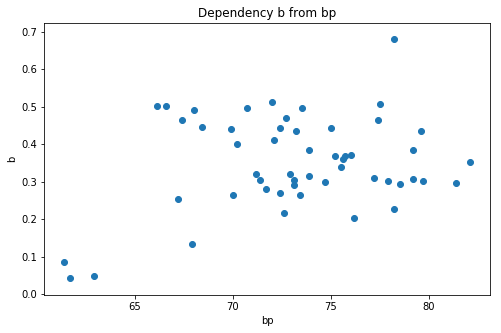

In [60]:
plt.figure(figsize=(8, 5))
plt.scatter(df["bp"], df["b"])
plt.title("Dependency b from bp")
plt.xlabel("bp")
plt.ylabel("b");

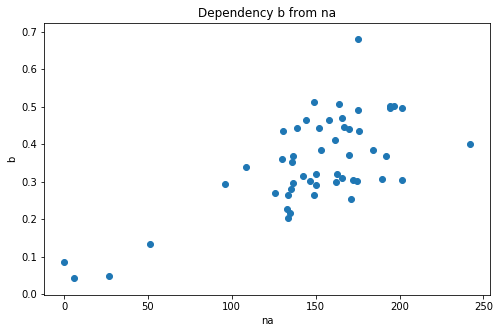

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(df["na"], df["b"])
plt.title("Dependency b from na")
plt.xlabel("na")
plt.ylabel("b");

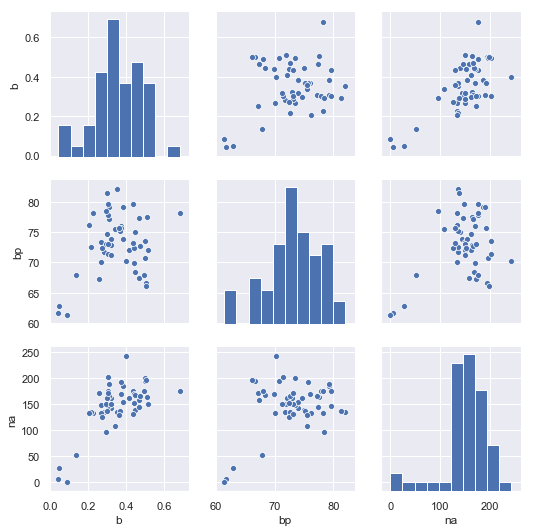

In [64]:
sns.pairplot(df.iloc[:, :-1]);

### 9. Линейная регрессия

In [66]:
linear = LinearRegression()

In [72]:
df["country"].nunique()

32

In [70]:
df_hot_encoded = pd.get_dummies(df, columns=["country"])

In [71]:
df_hot_encoded.head()

,b,bp,na,country_Argentina,country_Belgium,country_Brazil,country_Canada,country_Colombia,country_Denmark,country_East Germany,...,country_South Korea,country_SovietUnion,country_Spain,country_Taiwan,country_Trinidad,country_UK,country_US,country_USBlack,country_West Germany,country_Zimbabwe
0,0.512,72.0,149.3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.226,78.2,133.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.316,73.9,142.6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.042,61.7,5.8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.086,61.4,0.2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df_hot_encoded.iloc[:, 1:]

In [76]:
y = df_hot_encoded["b"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 10. Веса модели

In [94]:
X.shape

(52, 34)

In [96]:
print(len(linear.coef_), "\n", linear.coef_)

34 
 [-1.78299500e-03  6.43173614e-04  1.36761718e-01 -8.96206559e-02
  1.49880108e-15  1.19348975e-15  8.73193668e-02  1.99840144e-15
  7.99283430e-02  1.17795331e-01  7.31216104e-02  2.01227923e-16
 -6.24500451e-16  4.95388627e-02  2.28920328e-02  2.25948528e-05
 -1.85517548e-01 -6.74504382e-02 -1.49713833e-01 -2.77555756e-16
 -2.65674769e-01  4.05714660e-02 -2.69760794e-02  2.98029455e-01
  0.00000000e+00  2.79003470e-02  8.83131301e-02  5.89287609e-03
 -2.62768157e-03 -8.89795513e-03 -1.21499032e-01 -3.53033437e-02
 -7.85925007e-02  3.78670258e-03]


In [97]:
df_hot_encoded.columns[linear.coef_.argmax()] ### переменная, которая больше всего влияет на таргет

'country_Poland'

In [98]:
linear.intercept_ ### Свободный коэффициент

0.407588101929039

### 11. Прогнозы по тестовому датасету

In [100]:
predict = linear.predict(X_test)

In [103]:
mean_squared_error(y_test, predict) ### Среднеквадратическая ошибка

0.010380769352099898

In [107]:
r2_score(y_test, predict) ### коэффициент детерминации

-0.17113425573720775